### Laboratorio 3 Machine Learning: Algoritmos de Aprendizaje Supervisado

### Integrantes

- Julio Assmann
- Cristhian Solís
- Cristian Vásquez Poblete (no se presento)
- César Godoy Delaigue

***Pofresor: Tomas Fontecilla  - Machine Learning - Magister DataSicence UDD***

## Introducción

### Objetivo de la Tarea

El propósito de esta tarea es aplicar diversos algoritmos de **aprendizaje supervisado** en el conjunto de datos de **cáncer de mama**, utilizando herramientas de la librería **scikit-learn**. El objetivo es construir modelos predictivos que nos permitan clasificar si un tumor es maligno o benigno, basándonos en una serie de características extraídas de imágenes digitalizadas de células mamarias.

A lo largo del análisis, se evaluarán los siguientes métodos supervisados:

- **Naive Bayes**: Un clasificador probabilístico basado en la asunción de independencia entre características.
- **Análisis Discriminante Lineal**: Un método de clasificación que busca maximizar la separación entre las clases mediante una combinación lineal de las características.
- **Regresión Logística**: Un modelo lineal utilizado para predecir la probabilidad de una clase binaria.

### Descripción del Conjunto de Datos

El conjunto de datos utilizado es **Breast Cancer Wisconsin (Diagnostic)**, el cual se puede cargar directamente desde la librería `scikit-learn` utilizando la función `load_breast_cancer()`. Este dataset contiene **569 instancias** y **30 características** numéricas relacionadas con las propiedades físicas de las células mamarias, tales como:

- Radio del núcleo de la célula.
- Textura.
- Perímetro.
- Área.
- Simetría, entre otras.

Cada registro está asociado a una etiqueta de clase, indicando si el tumor es:
- **Maligno** (etiquetado como 0)
- **Benigno** (etiquetado como 1)

Este dataset es ampliamente utilizado para evaluar algoritmos de clasificación debido a su naturaleza bien estructurada y a la importancia del problema médico que aborda.

### Metodología

El análisis que se llevará a cabo incluirá las siguientes etapas:

1. **Exploración de Datos:** Realización de un análisis exploratorio para entender la distribución de las características y la relación con la variable objetivo (maligno o benigno).
2. **Ingeniería de Características:** Procesamiento de los datos, incluyendo normalización de las variables numéricas y evaluación de la importancia de las características.
3. **Aplicación de Algoritmos Supervisados:**
   - **Naive Bayes**
   - **Análisis Discriminante Lineal**
   - **Regresión Logística**
4. **Evaluación de Modelos:** Se utilizarán métricas de rendimiento como **precisión**, **recall**, **matriz de confusión** y **ROC-AUC** para evaluar el desempeño de cada algoritmo.
5. **Conclusiones:** Se resumirán los resultados clave y se identificarán las características más importantes en la clasificación de los tumores.


### ***Librerias***

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Exploración de Datos (EDA)

## 1.1 Carga de los datos

Primero cargamos el dataset y verificamos la estructura de los datos.

In [2]:
# Cargar el dataset
data = load_breast_cancer()

# Crear un DataFrame
df_breast_cancer = pd.DataFrame(data.data, columns=data.feature_names)

# Agregar la columna de la variable objetivo (target)
df_breast_cancer['target'] = data.target

# Mostrar las primeras filas del dataset
df_breast_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 1.2 Revisamos la información del Dataset

Revisamos la estructura, tipos de datos y valores faltantes.

In [3]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df_breast_cancer.shape

(569, 31)

In [5]:
df_breast_cancer.describe() # Estadísticas descriptivas

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


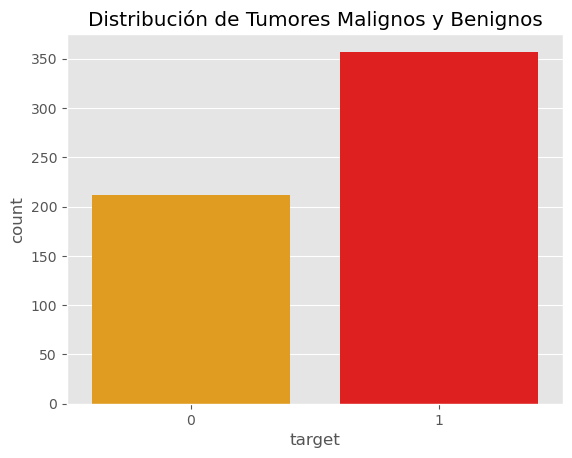

In [6]:
plt.style.use('ggplot')

# Contar la distribución de la variable objetivo con colores específicos

sns.countplot(x='target', data=df_breast_cancer, hue='target', palette=['orange', 'red'], legend=False)
plt.title('Distribución de Tumores Malignos y Benignos')
plt.show()

Calcular la matriz de correlación

In [7]:
# Calcular la matriz de correlación
correlation_matrix = df_breast_cancer.corr()

# Correlación de las variables con la variable objetivo 'target'
correlation_target = correlation_matrix['target'].sort_values(ascending=False)
print(correlation_target)


target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

Seleccionar las variables más correlacionadas

Una vez seleccionadas las variables más relevantes, generamos el pairplot solo con esas variables.

A partir de estos, podemos ver que las variables más correlacionadas negativamente con la variable objetivo (target) son las siguientes:

1. worst concave points (-0.79)
2. worst perimeter (-0.78)
3. mean concave points (-0.78)
4. worst radius (-0.78)
5. mean perimeter (-0.74)
6. worst area (-0.73)
7. mean radius (-0.73)

Estas variables tienen una fuerte correlación negativa con la variable target, lo que indica que a medida que estos valores aumentan, la probabilidad de que el tumor sea maligno aumenta.

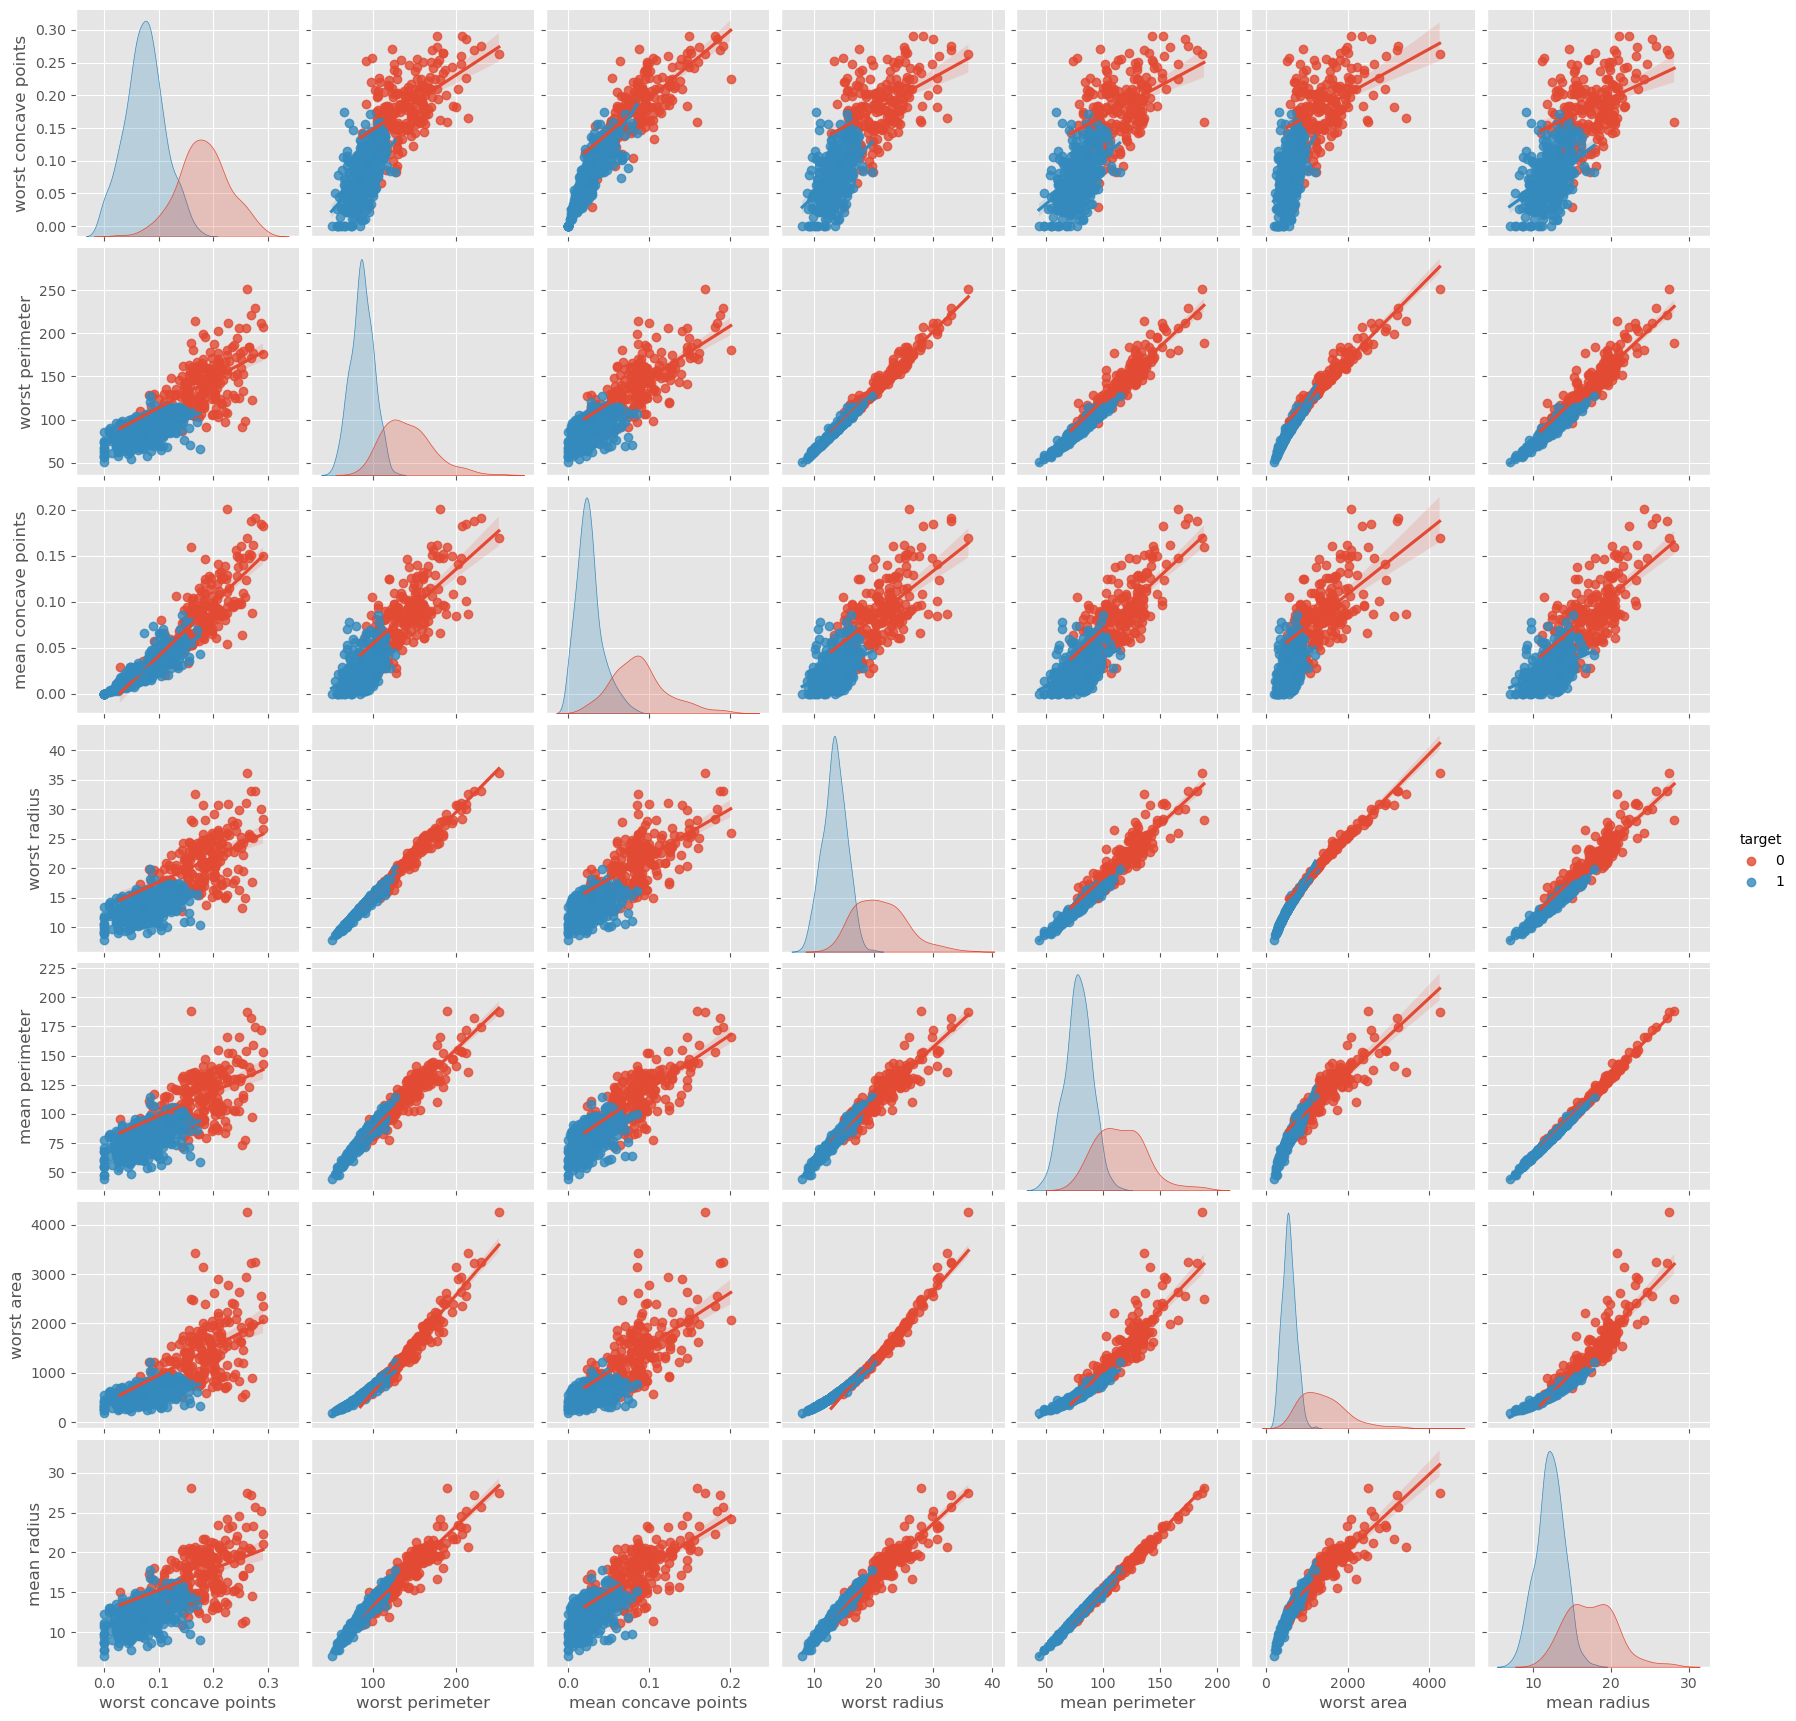

In [8]:
plt.style.use('ggplot')
# Seleccionar las variables más correlacionadas con 'target'
selected_features = ['worst concave points', 'worst perimeter', 'mean concave points', 
                    'worst radius', 'mean perimeter', 'worst area', 'mean radius', 'target']

# Crear un nuevo DataFrame con las variables seleccionadas
df_selected = df_breast_cancer[selected_features]

# Generar el pairplot simplificado
sns.pairplot(df_selected, hue='target', kind='reg', diag_kind='kde')
plt.show()


## Interpretación Pairplot (Simplificado)

El gráfico de pares muestra las relaciones entre las variables más correlacionadas con la variable objetivo (`target`), donde:
- **0**: Tumor maligno (naranja)
- **1**: Tumor benigno (azul)

### 1. Distribución de las Clases por Variable
En la diagonal del gráfico, observamos las distribuciones univariadas de cada una de las variables para ambas clases. Algunas observaciones clave:

- **Worst concave points y mean concave points**: Las distribuciones de los tumores malignos están desplazadas hacia valores más altos en comparación con los benignos. Esto sugiere que los tumores malignos tienden a tener más "puntos cóncavos", lo que podría reflejar la forma más irregular de las células malignas.
  
- **Worst perimeter y mean perimeter**: Se observa una clara diferencia en los valores de perímetro. Los tumores malignos suelen tener perímetros más grandes que los benignos, lo cual es coherente con el hecho de que los tumores malignos suelen ser más grandes y tener formas más irregulares.

- **Worst radius y mean radius**: Las variables relacionadas con el radio muestran un comportamiento similar al perímetro. Los tumores malignos tienen radios mayores, lo que probablemente también esté relacionado con su tamaño general.

- **Worst area y mean area**: Los tumores malignos tienen áreas considerablemente mayores que los benignos. Esta diferencia sugiere que el tamaño es un factor clave en la clasificación.

### 2. Relaciones Entre Variables
Los gráficos fuera de la diagonal muestran las relaciones bivariadas entre las variables, y destacan los siguientes patrones:

- **Relaciones lineales claras**: Las combinaciones de variables como `mean radius` vs. `mean perimeter` y `worst radius` vs. `worst perimeter` muestran relaciones lineales fuertes. Esto sugiere que estas características capturan aspectos similares del tamaño del tumor, lo que podría implicar que son variables redundantes. Para evitar problemas de multicolinealidad en los modelos predictivos, podría ser necesario ajustar o eliminar algunas de estas características.

- **Separación entre clases en relaciones específicas**: En algunas combinaciones, como `worst concave points` vs. `worst perimeter`, se observa una separación clara entre las clases. Los tumores malignos tienden a tener valores más altos en ambas variables, lo que refuerza la idea de que los tumores malignos son más grandes y tienen bordes más irregulares.

- **Superposición en algunas combinaciones**: En variables como `mean concave points` vs. `mean radius`, existe cierta superposición entre las clases, lo que indica que, aunque estas variables son útiles, no son suficientemente diferenciadoras por sí solas. Combinar varias variables o utilizar modelos no lineales puede ayudar a mejorar la clasificación.

### 3. Implicaciones para el Modelado
- **Tamaño y forma del tumor son indicadores clave**: Las variables relacionadas con el **radio**, **perímetro**, **área**, y **puntos cóncavos** están fuertemente correlacionadas con la clasificación de tumores malignos. Esto sugiere que estas características son fundamentales para predecir la malignidad del tumor.

- **Colinealidad**: Las fuertes correlaciones entre variables como `mean radius` y `mean perimeter` indican multicolinealidad. Para el modelado, podríamos considerar eliminar variables redundantes o aplicar técnicas de regularización (como Ridge o Lasso) para reducir el impacto de la colinealidad.

- **Relaciones no lineales**: Algunas relaciones no parecen seguir una tendencia lineal clara, lo que podría indicar que un modelo lineal puro, como la regresión logística, no capturaría completamente la complejidad de los datos. Modelos más complejos, como Random Forest o XGBoost, podrían aprovechar mejor estas relaciones no lineales.

### Conclusión
El gráfico de pares nos muestra que las características relacionadas con el tamaño del tumor (radio, área, perímetro) y la complejidad de sus bordes (puntos cóncavos) son las más útiles para diferenciar entre tumores malignos y benignos. Desde un punto de vista médico, los tumores malignos suelen ser más grandes y tener formas más irregulares. Sin embargo, algunas características están fuertemente correlacionadas entre sí, lo que sugiere que reducir la redundancia de las variables o aplicar regularización podría mejorar el rendimiento de los modelos predictivos.


# 2. Ingeniería de Características

## 2.1 Normalización de las características

Dado que las características numéricas tienen diferentes escalas, es necesario normalizar.

In [9]:
from sklearn.preprocessing import StandardScaler

# Separar las características y la variable objetivo
X = df_breast_cancer.drop('target', axis=1)
y = df_breast_cancer['target']

# Normalización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para mantener la estructura
X_scaled_df = pd.DataFrame(X_scaled, columns=data.feature_names)

# Mostrar las primeras filas de los datos normalizados
X_scaled_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## 2.2 Verificar correlaciones entre las características

Esto es útil para identificar si hay multicolinealidad.

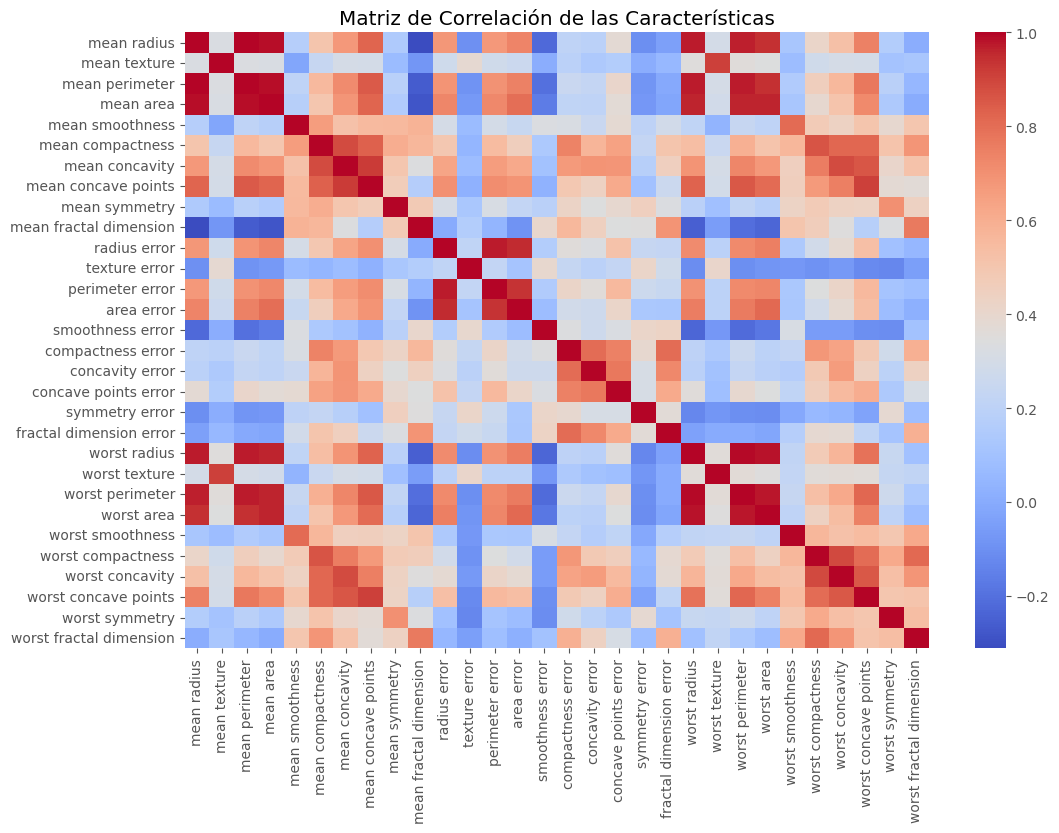

In [10]:
# Matriz de correlación
corr_matrix = X_scaled_df.corr()

# Mapa de calor de la correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación de las Características')
plt.show()


# 3. Aplicación de Algoritmos Supervisados

## 3.1 División de los datos en conjuntos de entrenamiento y prueba

Primero dividimos los datos para entrenamiento y prueba.

In [11]:
from sklearn.model_selection import train_test_split

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (398, 30)
Tamaño del conjunto de prueba: (171, 30)


## 2.2 Implementación de Naive Bayes

Aplicamos Naive Bayes y evaluamos su rendimiento.

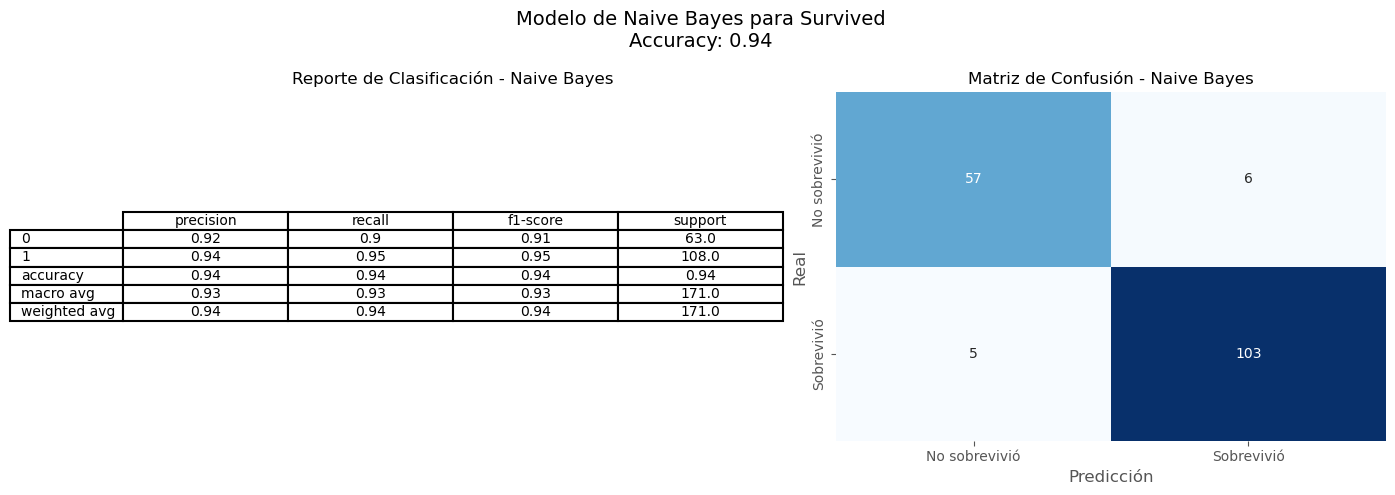

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Instanciar el modelo
nb_model = GaussianNB()

# Entrenar el modelo
nb_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_nb = nb_model.predict(X_test)

# Evaluar el modelo
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_df_nb = pd.DataFrame(classification_report(y_test, y_pred_nb, output_dict=True)).transpose().round(2)

# Resultados del modelo Naive Bayes
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Modelo de Naive Bayes para Survived\nAccuracy: {accuracy_nb:.2f}', fontsize=14)

# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación - Naive Bayes", fontsize=12)
ax[0].axis('off')
table_nb = ax[0].table(cellText=report_df_nb.values, colLabels=report_df_nb.columns, rowLabels=report_df_nb.index, cellLoc='center', loc='center', edges='BRTL')
table_nb.auto_set_font_size(False)
table_nb.set_fontsize(10)
table_nb.scale(1.2, 1.2)
for key, cell in table_nb.get_celld().items():
    cell.set_linewidth(1.5)

# Matriz de confusión
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
ax[1].set_title("Matriz de Confusión - Naive Bayes", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

## 3.3 Implementación de Análisis Discriminante Lineal

Aplicamos este segundo algoritmo.

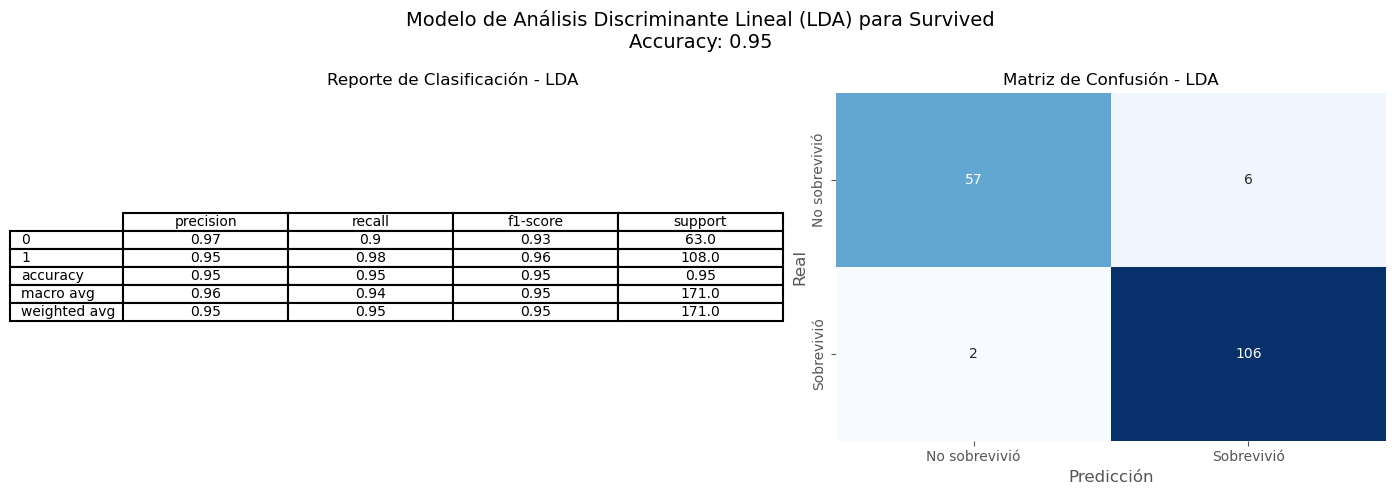

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instanciar el modelo
lda_model = LinearDiscriminantAnalysis()

# Entrenar el modelo
lda_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lda = lda_model.predict(X_test)

# Evaluar el modelo
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
report_df_lda = pd.DataFrame(classification_report(y_test, y_pred_lda, output_dict=True)).transpose().round(2)

# Resultados del Análisis Discriminante Lineal
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Modelo de Análisis Discriminante Lineal (LDA) para Survived\nAccuracy: {accuracy_lda:.2f}', fontsize=14)

# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación - LDA", fontsize=12)
ax[0].axis('off')
table_lda = ax[0].table(cellText=report_df_lda.values, colLabels=report_df_lda.columns, rowLabels=report_df_lda.index, cellLoc='center', loc='center', edges='BRTL')
table_lda.auto_set_font_size(False)
table_lda.set_fontsize(10)
table_lda.scale(1.2, 1.2)
for key, cell in table_lda.get_celld().items():
    cell.set_linewidth(1.5)

# Matriz de confusión
sns.heatmap(conf_matrix_lda, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
ax[1].set_title("Matriz de Confusión - LDA", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


## 3.4 Implementación de Regresión Logística

Finalmente, aplicamos regresión logística.

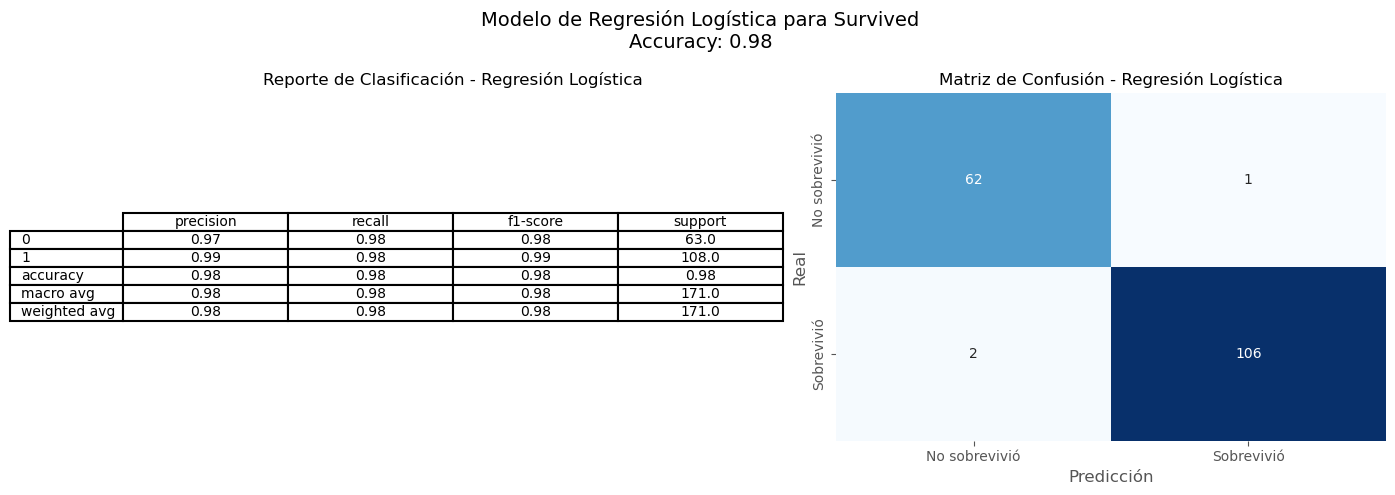

In [14]:
from sklearn.linear_model import LogisticRegression

# Instanciar el modelo
logreg_model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
logreg_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el modelo
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
report_df_logreg = pd.DataFrame(classification_report(y_test, y_pred_logreg, output_dict=True)).transpose().round(2)

# Resultados del modelo de Regresión Logística
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Modelo de Regresión Logística para Survived\nAccuracy: {accuracy_logreg:.2f}', fontsize=14)

# Reporte de clasificación
ax[0].set_title("Reporte de Clasificación - Regresión Logística", fontsize=12)
ax[0].axis('off')
table_logreg = ax[0].table(cellText=report_df_logreg.values, colLabels=report_df_logreg.columns, rowLabels=report_df_logreg.index, cellLoc='center', loc='center', edges='BRTL')
table_logreg.auto_set_font_size(False)
table_logreg.set_fontsize(10)
table_logreg.scale(1.2, 1.2)
for key, cell in table_logreg.get_celld().items():
    cell.set_linewidth(1.5)

# Matriz de confusión
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
ax[1].set_title("Matriz de Confusión - Regresión Logística", fontsize=12)
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

### 3.4.1 Análisis de importancia de las características en la Regresión Logística

In [16]:
# Obtener los coeficientes del modelo
coefficients = logreg_model.coef_[0]

# Crear un DataFrame para organizar los coeficientes junto con los nombres de las características
importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': coefficients
})

# Ordenar los coeficientes por su valor absoluto (importancia)
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Mostrar las 10 características más importantes
importance_df.head(10)


,Feature,Coefficient,Absolute Coefficient
21,worst texture,-1.323063,1.323063
10,radius error,-1.207227,1.207227
28,worst symmetry,-1.205759,1.205759
7,mean concave points,-1.094419,1.094419
26,worst concavity,-0.974141,0.974141
13,area error,-0.881542,0.881542
27,worst concave points,-0.835418,0.835418
20,worst radius,-0.806112,0.806112
23,worst area,-0.772227,0.772227
6,mean concavity,-0.769889,0.769889


### 3.4.2 Visualización de la importancia de las características:

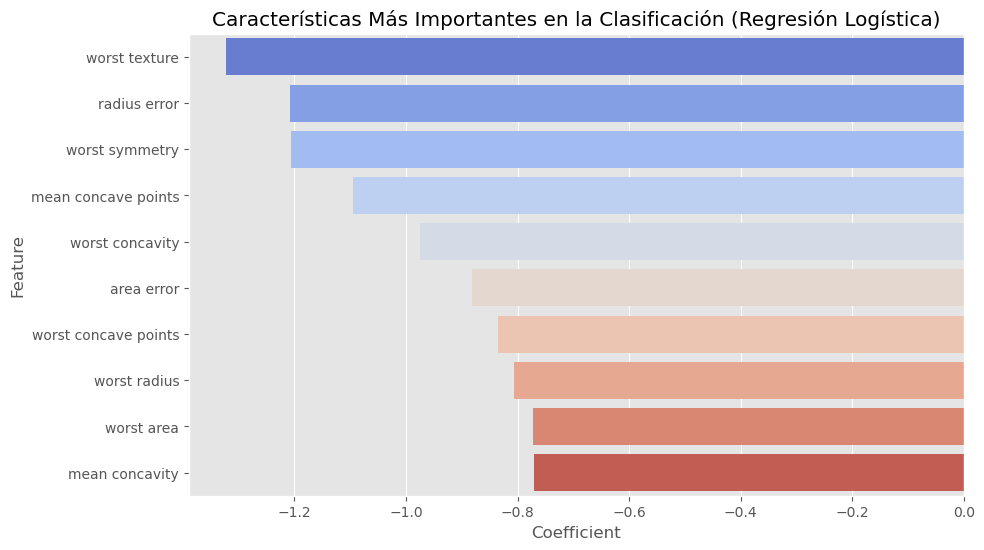

In [17]:
# Gráfico de barras para los coeficientes más importantes
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df.head(10), hue='Feature', palette='coolwarm', dodge=False, legend=False)
plt.title('Características Más Importantes en la Clasificación (Regresión Logística)')
plt.show()


Interpretación de los coeficientes:

* Valores positivos: Indican que un incremento en esa característica aumenta la probabilidad de que el tumor sea benigno (clase 1).

* Valores negativos: Indican que un incremento en esa característica aumenta la probabilidad de que el tumor sea maligno (clase 0).

* Magnitud del coeficiente: El valor absoluto del coeficiente indica la relevancia de la característica; cuanto mayor sea el valor absoluto,  mayor será el impacto en las predicciones.

Características Más Importantes:

* Worst Texture: Es la característica con mayor peso negativo en el modelo, lo que indica que a medida que el valor de la textura "peor" (worst texture) aumenta, la probabilidad de que el tumor sea maligno también aumenta significativamente.

* Radius Error: También tiene un gran impacto en la clasificación, donde un incremento en el error del radio indica mayor probabilidad de malignidad.

* Worst Symmetry: Esta característica sigue en importancia, donde una mayor simetría "peor" también indica una mayor probabilidad de malignidad.

* Mean Concave Points: Es una de las pocas características con un coeficiente positivo, lo que significa que un aumento en los puntos cóncavos promedio indica una mayor probabilidad de que el tumor sea benigno.

Observaciones Generales:

* Características relacionadas con la "peor" medición (worst): Estas características relacionadas con la "peor" textura, concavidad y simetría parecen ser particularmente importantes para identificar tumores malignos.

* Concave Points y Area Error: Estas características también juegan un rol, pero con menor peso comparativo en la predicción.

Conclusión de la Importancia:

El análisis de los coeficientes confirma que las mediciones relacionadas con las peores propiedades de las células mamarias (como textura, radio y simetría) tienen un impacto crucial en la predicción de tumores malignos, mientras que los puntos cóncavos promedio parecen estar más relacionados con tumores benignos.



# 4. Conclusiones

Comparación de Resultados:

1.- Naive Bayes (NB):

* Accuracy: 0.936
* Precision: 0.92 para la clase 0 (maligno) y 0.94 para la clase 1 (benigno).
* Recall: 0.90 para la clase 0 y 0.95 para la clase 1.
* F1-Score: 0.91 para la clase 0 y 0.95 para la clase 1.

Observaciones: El modelo de Naive Bayes muestra un buen rendimiento general, pero tiene un pequeño margen de error en la clase 0, donde el recall es menor (0.90), lo que sugiere que se pierde un pequeño porcentaje de predicciones correctas para tumores malignos.


2.- Análisis Discriminante Lineal (LDA):

* Accuracy: 0.953
* Precision: 0.97 para la clase 0 y 0.95 para la clase 1.
* Recall: 0.90 para la clase 0 y 0.98 para la clase 1.
* F1-Score: 0.93 para la clase 0 y 0.96 para la clase 1.

Observaciones: El modelo LDA muestra una precisión ligeramente mayor que Naive Bayes. Sin embargo, el recall para la clase 0 (0.90) sigue siendo algo inferior, lo que indica que el modelo no detecta algunos tumores malignos correctamente.

3.- Regresión Logística (LogReg):

* Accuracy: 0.982
* Precision: 0.97 para la clase 0 y 0.99 para la clase 1.
* Recall: 0.98 para la clase 0 y 0.98 para la clase 1.
* F1-Score: 0.98 para la clase 0 y 0.99 para la clase 1.

Observaciones: La regresión logística es claramente el mejor modelo entre los tres. Muestra la mejor precisión, recall y F1-score tanto para tumores malignos (clase 0) como para benignos (clase 1). Su capacidad para detectar correctamente los tumores malignos es sobresaliente (recall = 0.98).

***Conclusiones***:

* Rendimiento General: El modelo de Regresión Logística es el que ofrece el mejor rendimiento en todos los aspectos (precisión, recall y F1-score) con una exactitud del 98.2%. Esto lo convierte en el mejor modelo para predecir si un tumor es maligno o benigno.

* Detección de Tumores Malignos (Clase 0): La regresión logística también es superior a Naive Bayes y LDA para la detección de tumores malignos, con un recall de 0.98, lo que significa que casi todas las predicciones de tumores malignos son correctas.

* Detección de Tumores Benignos (Clase 1): Tanto Naive Bayes como LDA y LogReg son efectivos para detectar tumores benignos, pero LogReg se destaca ligeramente con una precisión y recall superiores.